In [1]:
%pip install pandas scapy matplotlib seaborn category_encoders


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

df = pd.read_csv("/Users/safwanahmed/Desktop/capstone/DNN/dataset/DNN-EdgeIIoT-dataset.csv",low_memory=False)

In [4]:
df = df[df['Attack_type'] != 'Fingerprinting'].reset_index(drop=True)

In [5]:
taken_features = ['ip.src_host', 'ip.dst_host','arp.opcode', 'arp.hw.size', 'icmp.checksum', 'icmp.seq_le', 'http.content_length', 'http.request.method', 'http.referer', 'http.request.version', 'http.response', 'tcp.ack', 'tcp.ack_raw', 'tcp.checksum', 'tcp.connection.fin', 'tcp.connection.rst', 'tcp.connection.syn', 'tcp.connection.synack', 'tcp.flags', 'tcp.flags.ack', 'tcp.len', 'tcp.seq', 'udp.stream', 'udp.time_delta', 'dns.qry.name', 'dns.qry.name.len', 'dns.qry.qu', 'dns.retransmission', 'dns.retransmit_request', 'mqtt.conack.flags', 'mqtt.conflag.cleansess', 'mqtt.conflags', 'mqtt.hdrflags', 'mqtt.len', 'mqtt.msgtype', 'mqtt.proto_len', 'mqtt.protoname', 'mqtt.topic', 'mqtt.topic_len', 'mqtt.ver', 'Attack_label', 'Attack_type','http.request.uri.query','http.file_data','tcp.dstport','tcp.srcport','tcp.options']
total_features = df.columns
features_to_be_dropped = []
for feature in total_features:
    if feature not in taken_features:
        features_to_be_dropped.append(feature)


In [6]:
features_to_be_dropped

['frame.time',
 'arp.dst.proto_ipv4',
 'arp.src.proto_ipv4',
 'icmp.transmit_timestamp',
 'icmp.unused',
 'http.request.full_uri',
 'http.tls_port',
 'tcp.payload',
 'udp.port',
 'dns.qry.type',
 'dns.retransmit_request_in',
 'mqtt.msg_decoded_as',
 'mqtt.msg',
 'mbtcp.len',
 'mbtcp.trans_id',
 'mbtcp.unit_id']

In [7]:
df = df.drop(columns = features_to_be_dropped)

In [8]:
df['Attack_type'].unique()


array(['Normal', 'MITM', 'Uploading', 'Ransomware', 'SQL_injection',
       'DDoS_HTTP', 'DDoS_TCP', 'Password', 'Port_Scanning',
       'Vulnerability_scanner', 'Backdoor', 'XSS', 'DDoS_UDP',
       'DDoS_ICMP'], dtype=object)

In [9]:
df.dropna(inplace=True)

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
from sklearn.utils import shuffle
df = shuffle(df).reset_index(drop=True)

In [12]:
print(df.select_dtypes(include=['object']).columns)

Index(['ip.src_host', 'ip.dst_host', 'http.file_data',
       'http.request.uri.query', 'http.request.method', 'http.referer',
       'http.request.version', 'tcp.options', 'tcp.srcport',
       'dns.qry.name.len', 'mqtt.conack.flags', 'mqtt.protoname', 'mqtt.topic',
       'Attack_type'],
      dtype='object')


In [13]:
df['Attack_label'].unique()
df['Attack_type'].unique()

array(['Normal', 'Password', 'DDoS_HTTP', 'DDoS_ICMP', 'SQL_injection',
       'DDoS_UDP', 'Backdoor', 'DDoS_TCP', 'Vulnerability_scanner',
       'Uploading', 'XSS', 'Ransomware', 'Port_Scanning', 'MITM'],
      dtype=object)

In [14]:
def summarize_by_category(df):
    return df['Attack_type'].value_counts() 

In [15]:
original_DNN_data = pd.read_csv("/Users/safwanahmed/Desktop/capstone/DNN/dataset/DNN-EdgeIIoT-dataset.csv", low_memory=False)
summary_original_DNN = summarize_by_category(original_DNN_data)

In [16]:
summary_preprocessed_DNN = summarize_by_category(df)

In [17]:
print("DNN data: original")
print(summary_original_DNN)
print("DNN data: preprocessed")

print(summary_preprocessed_DNN)

DNN data: original
Attack_type
Normal                   1615643
DDoS_UDP                  121568
DDoS_ICMP                 116436
SQL_injection              51203
Password                   50153
Vulnerability_scanner      50110
DDoS_TCP                   50062
DDoS_HTTP                  49911
Uploading                  37634
Backdoor                   24862
Port_Scanning              22564
XSS                        15915
Ransomware                 10925
MITM                        1214
Fingerprinting              1001
Name: count, dtype: int64
DNN data: preprocessed
Attack_type
Normal                   1435534
DDoS_UDP                  121567
DDoS_ICMP                 116431
SQL_injection              50974
Password                   50078
DDoS_TCP                   50062
Vulnerability_scanner      50029
DDoS_HTTP                  49836
Uploading                  37237
Backdoor                   24034
Port_Scanning              19979
XSS                        15081
Ransomware       

In [18]:
df.drop(columns=['ip.src_host','ip.dst_host'], inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2030899 entries, 0 to 2030898
Data columns (total 45 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   arp.opcode              float64
 1   arp.hw.size             float64
 2   icmp.checksum           float64
 3   icmp.seq_le             float64
 4   http.file_data          object 
 5   http.content_length     float64
 6   http.request.uri.query  object 
 7   http.request.method     object 
 8   http.referer            object 
 9   http.request.version    object 
 10  http.response           float64
 11  tcp.ack                 float64
 12  tcp.ack_raw             float64
 13  tcp.checksum            float64
 14  tcp.connection.fin      float64
 15  tcp.connection.rst      float64
 16  tcp.connection.syn      float64
 17  tcp.connection.synack   float64
 18  tcp.dstport             float64
 19  tcp.flags               float64
 20  tcp.flags.ack           float64
 21  tcp.len                 float64

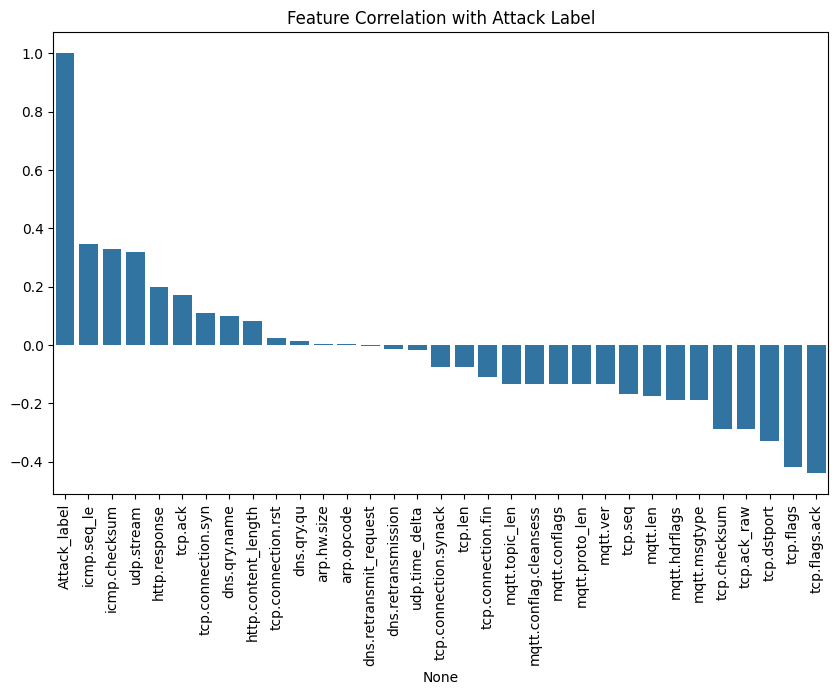

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation with attack label
correlation_matrix = df.corr(numeric_only=True)

attack_correlation = correlation_matrix["Attack_label"].sort_values(ascending=False)

# Visualize top correlated features
plt.figure(figsize=(10, 6))
sns.barplot(x=attack_correlation.index, y=attack_correlation.values)
plt.xticks(rotation=90)
plt.title("Feature Correlation with Attack Label")
plt.show()

In [21]:
categ_cols = ["http.request.method","http.referer","http.request.version","dns.qry.name.len","mqtt.conack.flags","mqtt.protoname","mqtt.topic"]

DNN_data_encoded = pd.get_dummies(df, columns=categ_cols, dtype=int)

In [22]:
def add_6_categories_column(Attack_type):
    new_column = []
    for attack in Attack_type:
        if attack in ["DDoS_TCP","DDoS_UDP", "DDoS_ICMP", "DDoS_HTTP"]:
            new_column.append("DoS/DDoS")

        if attack in ["Vulnerability_scanner","Port_Scanning", "Fingerprinting"]:
            new_column.append("Scanning_Attacks")

        if attack in ["MITM"]:
            new_column.append("MITM")

        if attack in ["XSS","SQL_injection", "Uploading"]:
            new_column.append("Injection Attacks")

        if attack in ["Ransomware", "Backdoor","Password"]:
            new_column.append("Malware")

        if attack in ["Normal"]:
            new_column.append("Normal")
    return new_column    

In [23]:
DNN_categories = add_6_categories_column(DNN_data_encoded["Attack_type"])


In [24]:
DNN_data_encoded["Attack_class"] = DNN_categories
DNN_data_encoded["Attack_type"].unique()

array(['Normal', 'Password', 'DDoS_HTTP', 'DDoS_ICMP', 'SQL_injection',
       'DDoS_UDP', 'Backdoor', 'DDoS_TCP', 'Vulnerability_scanner',
       'Uploading', 'XSS', 'Ransomware', 'Port_Scanning', 'MITM'],
      dtype=object)

In [25]:
DNN_data_encoded.shape

(2030899, 95)

In [26]:
DNN_data_encoded.to_csv("/Users/safwanahmed/Desktop/capstone/DNN/dataset/processed_dataset.csv", index=False)
